In [29]:
#import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob 

In [2]:
#list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Sales_April_2019.csv',
 'Sales_November_2019.csv',
 'Sales_December_2019.csv',
 'Sales_March_2019.csv',
 'Sales_February_2019.csv',
 'Sales_October_2019.csv',
 'Sales_July_2019.csv',
 'Sales_May_2019.csv',
 'Sales_August_2019.csv',
 'Sales_September_2019.csv',
 'Sales_January_2019.csv',
 'Sales_June_2019.csv']

In [4]:
#Make single data for  all csv 
data = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
# first five column of data 
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data_Preprocessesing AND Data_Preprocessing

In [8]:
#cheaking shape of data 
data.shape

(186850, 6)

In [5]:
#cheaking dtype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
#cheaking null valus 
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [22]:
#let us  dropthe null value 
data.dropna(how='all',inplace=True)
#let us cheak it again ]
"NAN value :"
data[data.isna().any(axis=1)]
## future warning! ValueError: invalid literal for int() with base 10: 
data = data[data['Order Date'].str[0:2] != 'Or']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [24]:
#changeing dtype of column 
data['Quantity Ordered']=data['Quantity Ordered'].astype('int64')   # convert to int64
data['Price Each']=data['Price Each'].astype('float')               #convert to float 
data['Order Date']=pd.to_datetime(data['Order Date'])               #convert to date time 

<ipython-input-24-2e4a0e15c82b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered']=data['Quantity Ordered'].astype('int64')
<ipython-input-24-2e4a0e15c82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']=data['Price Each'].astype('float')


Now we add another columns like manth hours days cities

In [26]:
def augment_data(data):
  ''' now we add some columns 
  that  are  born  from another columns 
  '''
  #function to get city 
  def get_city(address):
    return address.split(',')[1]

  #function to get state 
  def get_state(address):
    return address.split(',')[2].split( ' ')[1]

  #adding year ti column 
  data['year']=data['Order Date'].dt.year

  #adding month to column 
  data['month']=data['Order Date'].dt.month

  #adding hour to column 
  data['hour']=data['Order Date'].dt.hour

  #adding minute to column 
  data['minute']=data['Order Date'].dt.minute

  ## now let us make the sales column by multiply quantity by price 
  data['sales']=data['Price Each']*data['Quantity Ordered']

  #let us get the cities in orderd column 
  data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 

  return data

#now apply this function 
data=augment_data(data)
data.head()
  
  


<ipython-input-26-5a94d2401468>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data['Order Date'].dt.year
<ipython-input-26-5a94d2401468>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']=data['Order Date'].dt.month
<ipython-input-26-5a94d2401468>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,hour,minute,sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,11.99,Los Angeles (CA)


# Data_Analysis

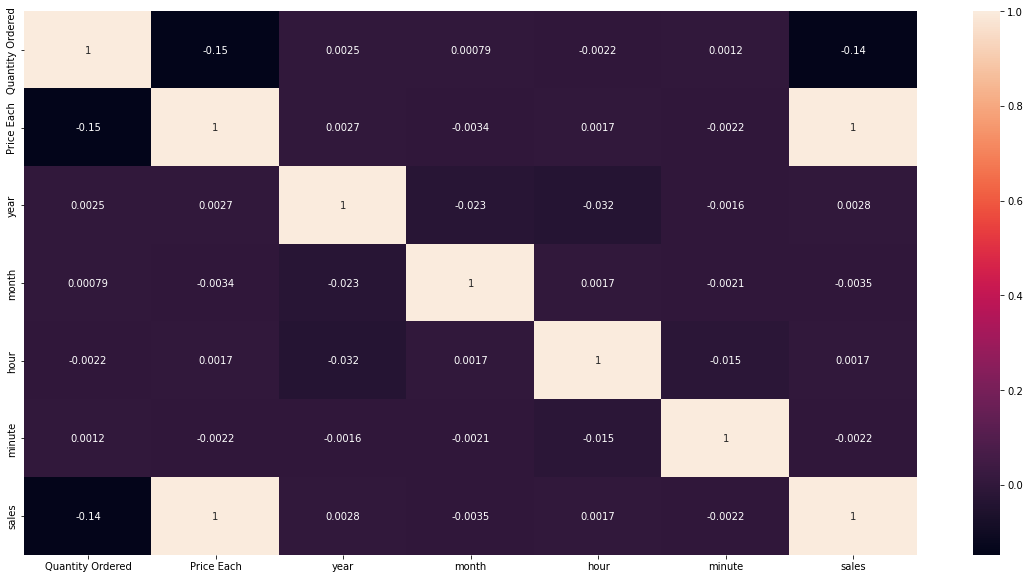

In [33]:
#Now we plot heatmap to cheak relationship between dependent and independent variable 
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Now we cheak the best year of sale and how much you earned that year

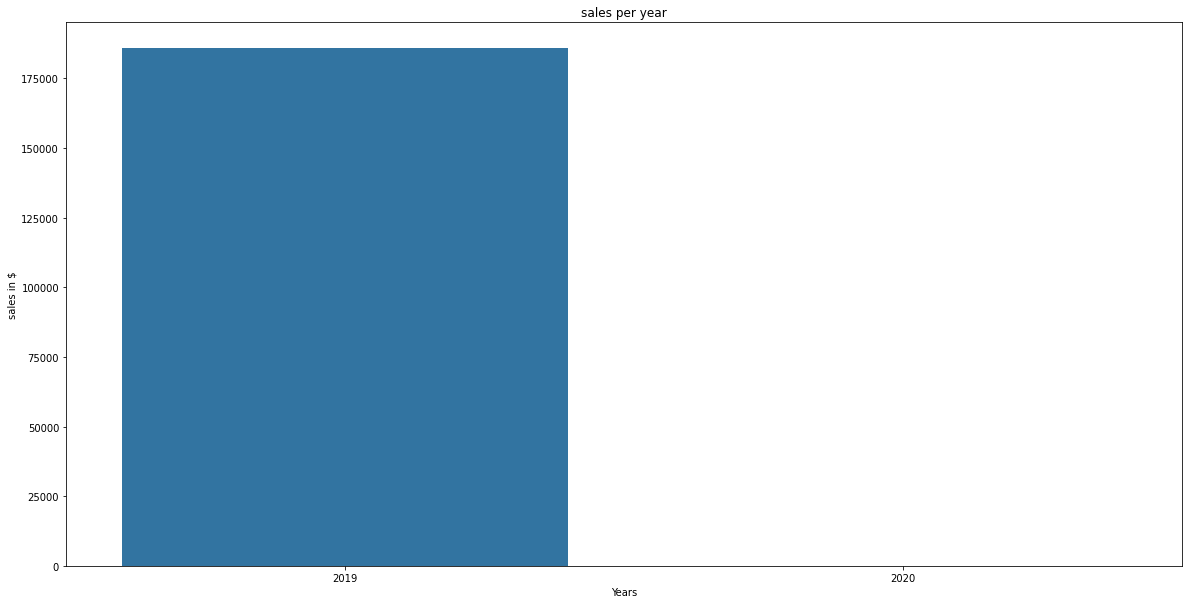

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='year',data=data)
plt.xlabel('Years')
plt.ylabel('sales in $')
plt.title("sales per year")
plt.show()

In [36]:
data.groupby('year').sum()

,Quantity Ordered,Price Each,month,hour,minute,sales
year,,,,,,
2019,209038,34280627.28,1312613,2680102,5481128,34483365.68
2020,41,8503.40,34,52,931,8670.29


## As we see in above figure  we see that 2019 has maximum sales  of 34483365.68 and  in 2020 has  less sale of 8670.29 as compare to 2019 This is due to  COVID or due to inbalance dataset 

Now we cheak what is the best month of sale and how it earn in    that month 

In [38]:
data.groupby('month').sum()

,Quantity Ordered,Price Each,year,hour,minute,sales
month,,,,,,
1,10903,1811768.38,19602505,139485,282440,1822256.73
2,13449,2188884.72,24177525,172669,354885,2202022.42
3,17005,2791207.83,30593907,218969,447559,2807100.38
4,20558,3367671.02,36905301,262259,544186,3390670.24
5,18667,3135125.13,33446754,238780,487899,3152606.75
6,15253,2562025.61,27365526,195528,402436,2577802.26
7,16072,2632539.56,28857567,206169,417349,2647775.76
8,13448,2230345.42,24149259,172289,353857,2244467.88
9,13109,2084992.09,23462799,168513,341698,2097560.13


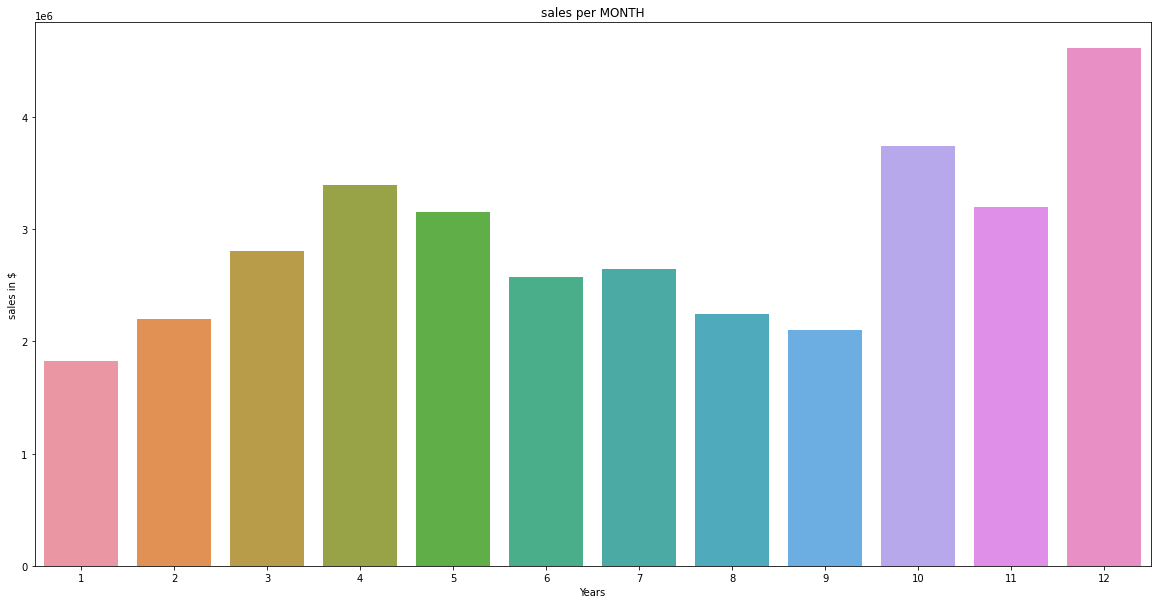

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x=data.groupby('month').sum().index,y=data.groupby('month').sum()['sales'],data=data)
plt.xlabel('Years')
plt.ylabel('sales in $')
plt.title("sales per MONTH")
plt.show()

## now we find Which City had the highest number of sales

In [45]:
data.groupby('Cities').sum()

,Quantity Ordered,Price Each,year,month,hour,minute,sales
Cities,,,,,,,
Atlanta (GA),16602,2779908.20,30044739,104794,214264,442932,2795498.58
Austin (TX),11153,1809873.61,19998197,69829,141946,289060,1819581.75
Boston (MA),22528,3637409.77,40246750,141112,288225,590442,3661642.01
Dallas (TX),16730,2752627.82,29921582,104620,214390,435155,2767975.40
Los Angeles (CA),33289,5421435.23,59772496,208325,427444,866638,5452570.80
New York City (NY),27932,4635370.83,50224654,175741,357696,733598,4664317.43
Portland (ME),2750,447189.25,4956645,17144,35211,72856,449758.27
Portland (OR),11303,1860558.22,20210192,70621,144421,295533,1870732.34
San Francisco (CA),50239,8211461.74,90313920,315520,643265,1319477,8262203.91


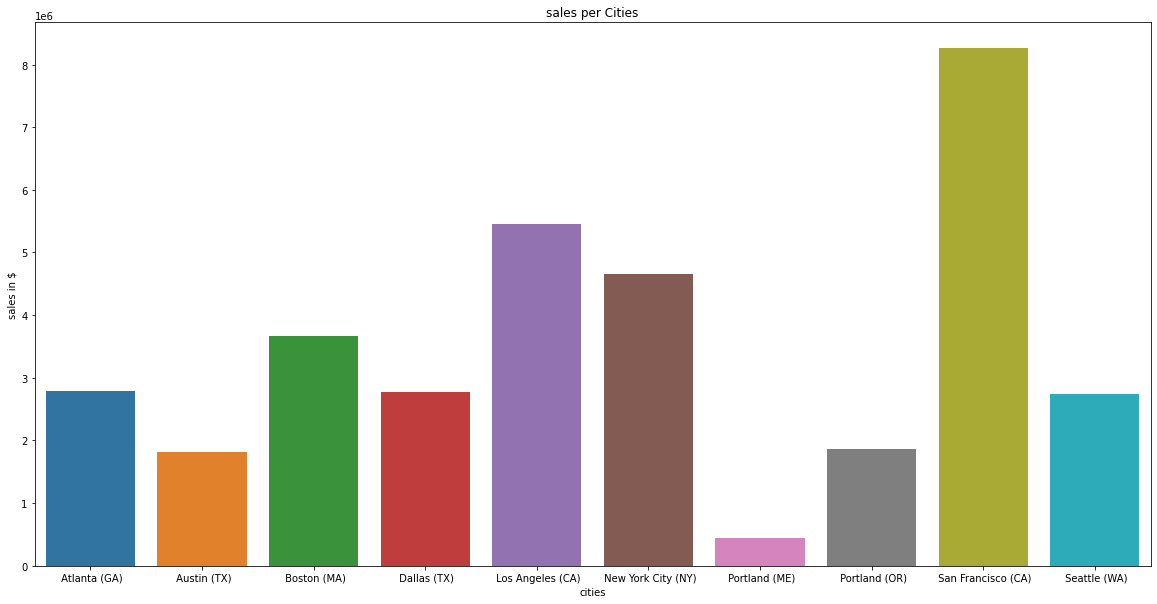

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x=data.groupby('Cities').sum().index,y=data.groupby('Cities').sum()['sales'],data=data)
plt.xlabel('cities')
plt.ylabel('sales in $')
plt.title("sales per Cities")
plt.show()

## Now we cheak what time should we display advertismant to maximize likelihood of customers  buying product 

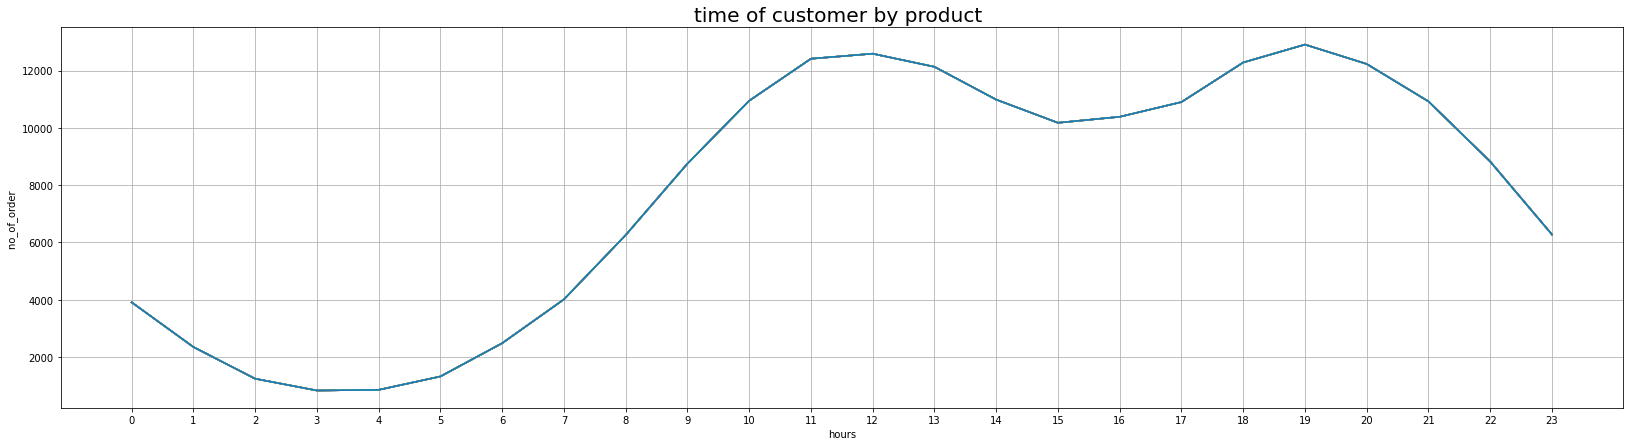

In [74]:
hrs=[hour for hour,df in data.groupby('hour')]
plt.figure(figsize=(28,7))
plt.plot(hrs,data.groupby(['hour']).count())
plt.xlabel('hours')
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.xticks(hrs)
plt.ylabel('no_of_order ')
plt.title('time of customer by product ')
plt.show()

so as we that from above diagram 9am or 10am is best time to play an add 

In [60]:
data.groupby('Product').sum()

,Quantity Ordered,Price Each,year,month,hour,minute,sales
Product,,,,,,,
20in Monitor,4129,451068.99,8279921,29336,58764,122252,454148.71
27in 4K Gaming Monitor,6244,2429637.70,12578371,44440,90916,184331,2435097.56
27in FHD Monitor,7550,1125974.93,15156636,52558,107540,219948,1132424.50
34in Ultrawide Monitor,6199,2348718.19,12479439,43304,89076,183480,2355558.01
AA Batteries (4-pack),27635,79015.68,41544963,145558,298342,609039,106118.40
AAA Batteries (4-pack),31017,61716.59,41674182,146370,297332,612113,92740.83
Apple Airpods Headphones,15661,2332350.00,31393435,109477,223304,455570,2349150.00
Bose SoundSport Headphones,13457,1332366.75,26903178,94113,192445,392603,1345565.43
Flatscreen TV,4819,1440000.00,9691201,34224,68815,142789,1445700.00


In [65]:
#let us prepare a variable for plotting 
product_group=data.groupby('Product')
quantity_orderd=product_group.sum()['Quantity Ordered']
prices = data.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]


Text(0, 0.5, 'Price in USD ($)')

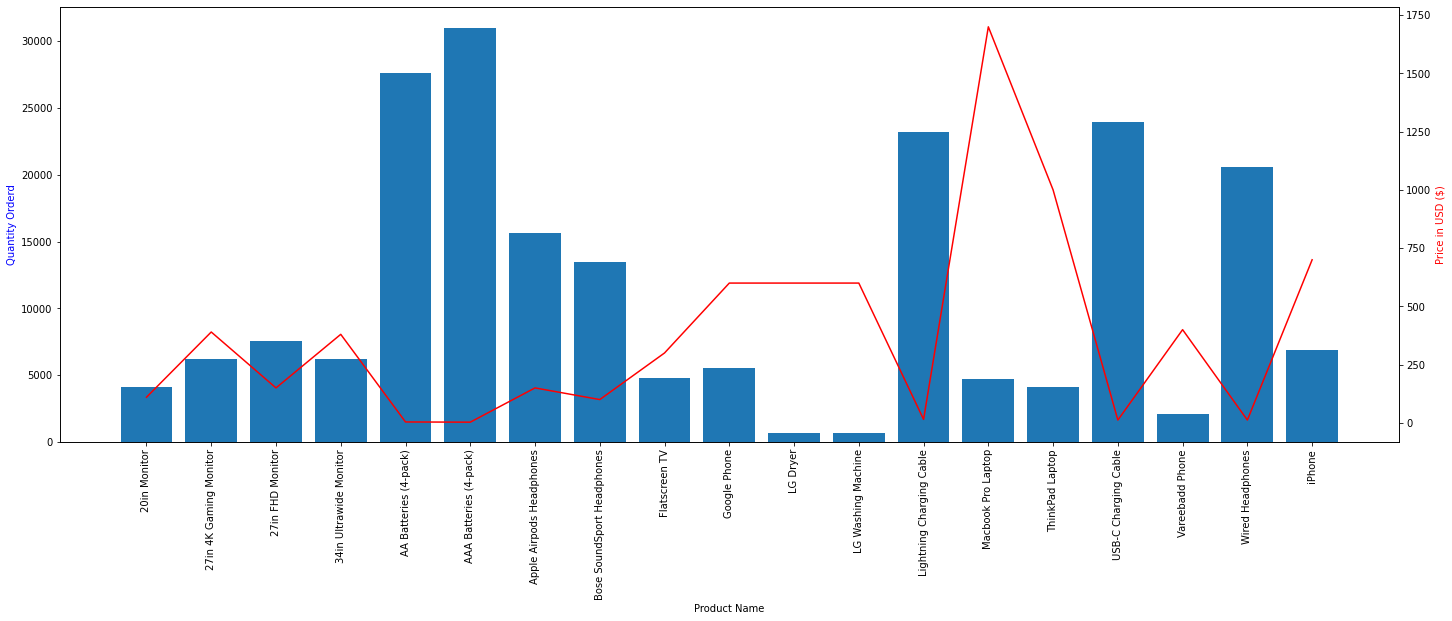

In [68]:
#now we vizualize it 
fig, ax1 = plt.subplots(figsize=(24, 8))
ax2 = ax1.twinx()
# AXES 1
ax1.bar(products, quantity_orderd)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Orderd', color='b')
ax1.set_xticklabels(products, rotation='vertical')
# AXES 2
ax2.plot(products, prices, 'r-')
ax2.set_ylabel('Price in USD ($)', color='r')

## Total Sale and Quantity ordered of different products over months

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Title')

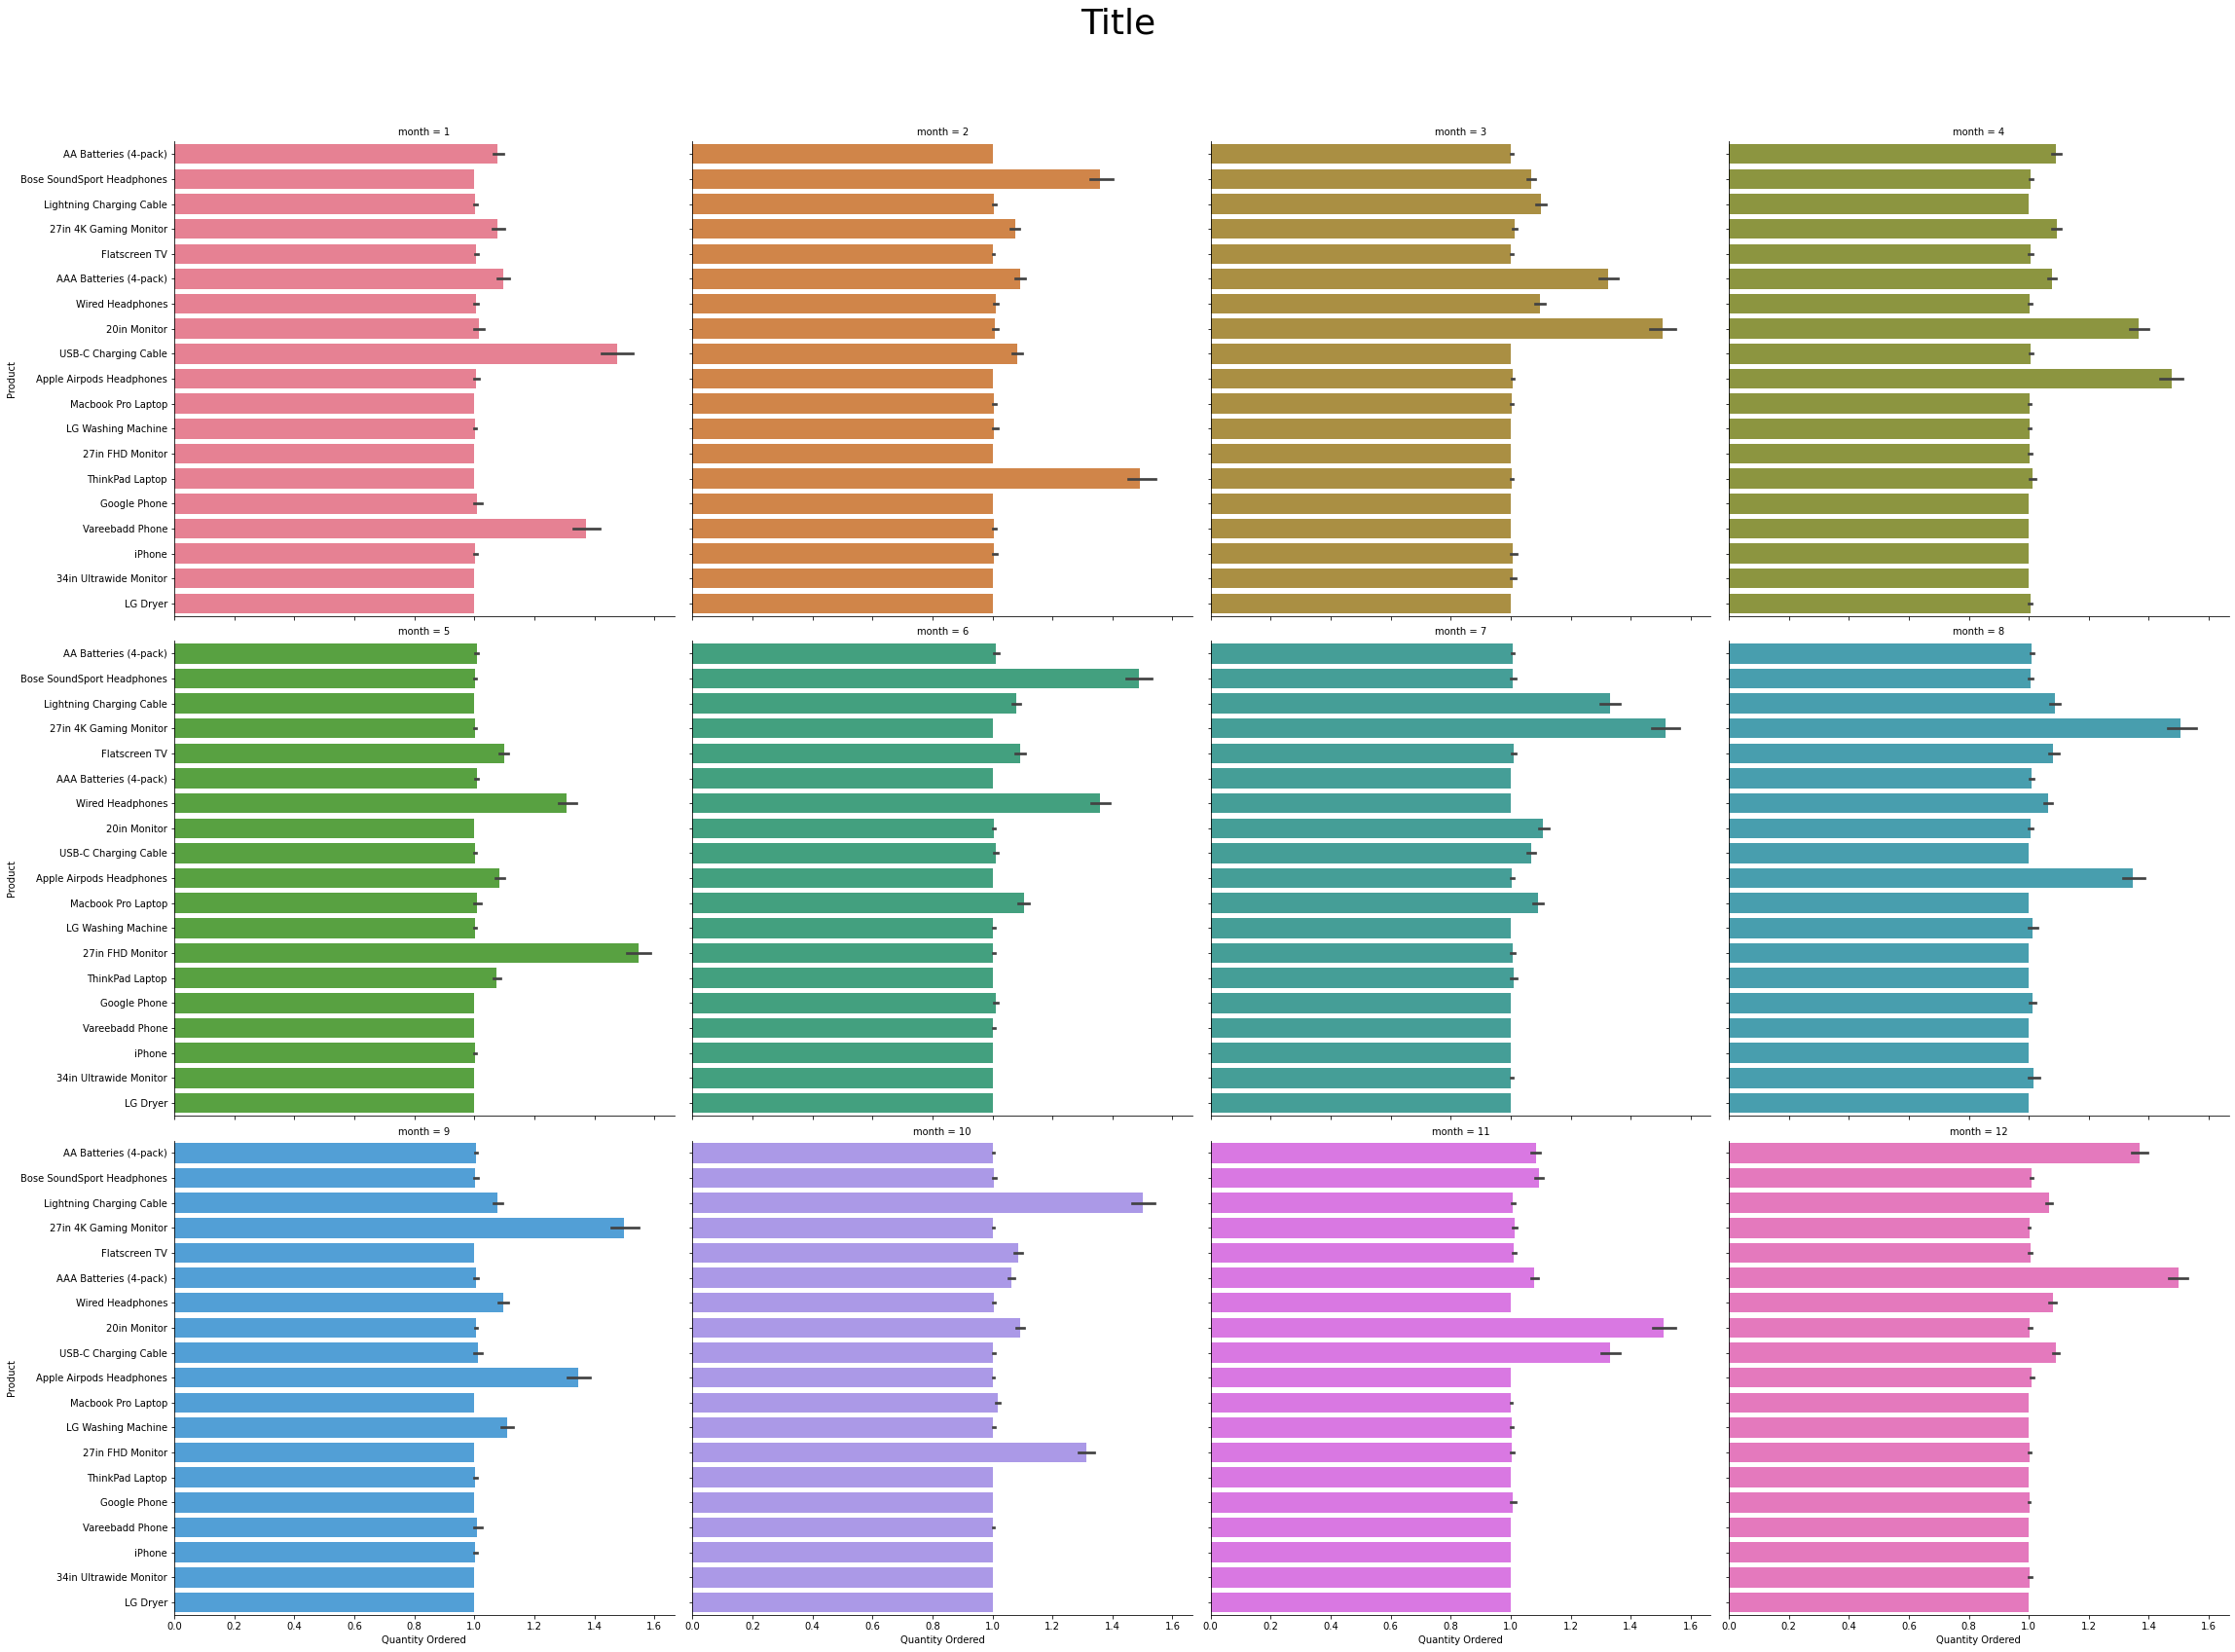

In [69]:
temp_data = data.groupby(['month', 'Product']).sum().reset_index()

#
g = sns.FacetGrid(data, col="month", hue='month', col_wrap=4, size=8)
g.map(sns.barplot, "Quantity Ordered", "Product")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Title', fontsize=36)

## Now we cheak how much of each product sell in each city 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'City/Product/Total Sale')

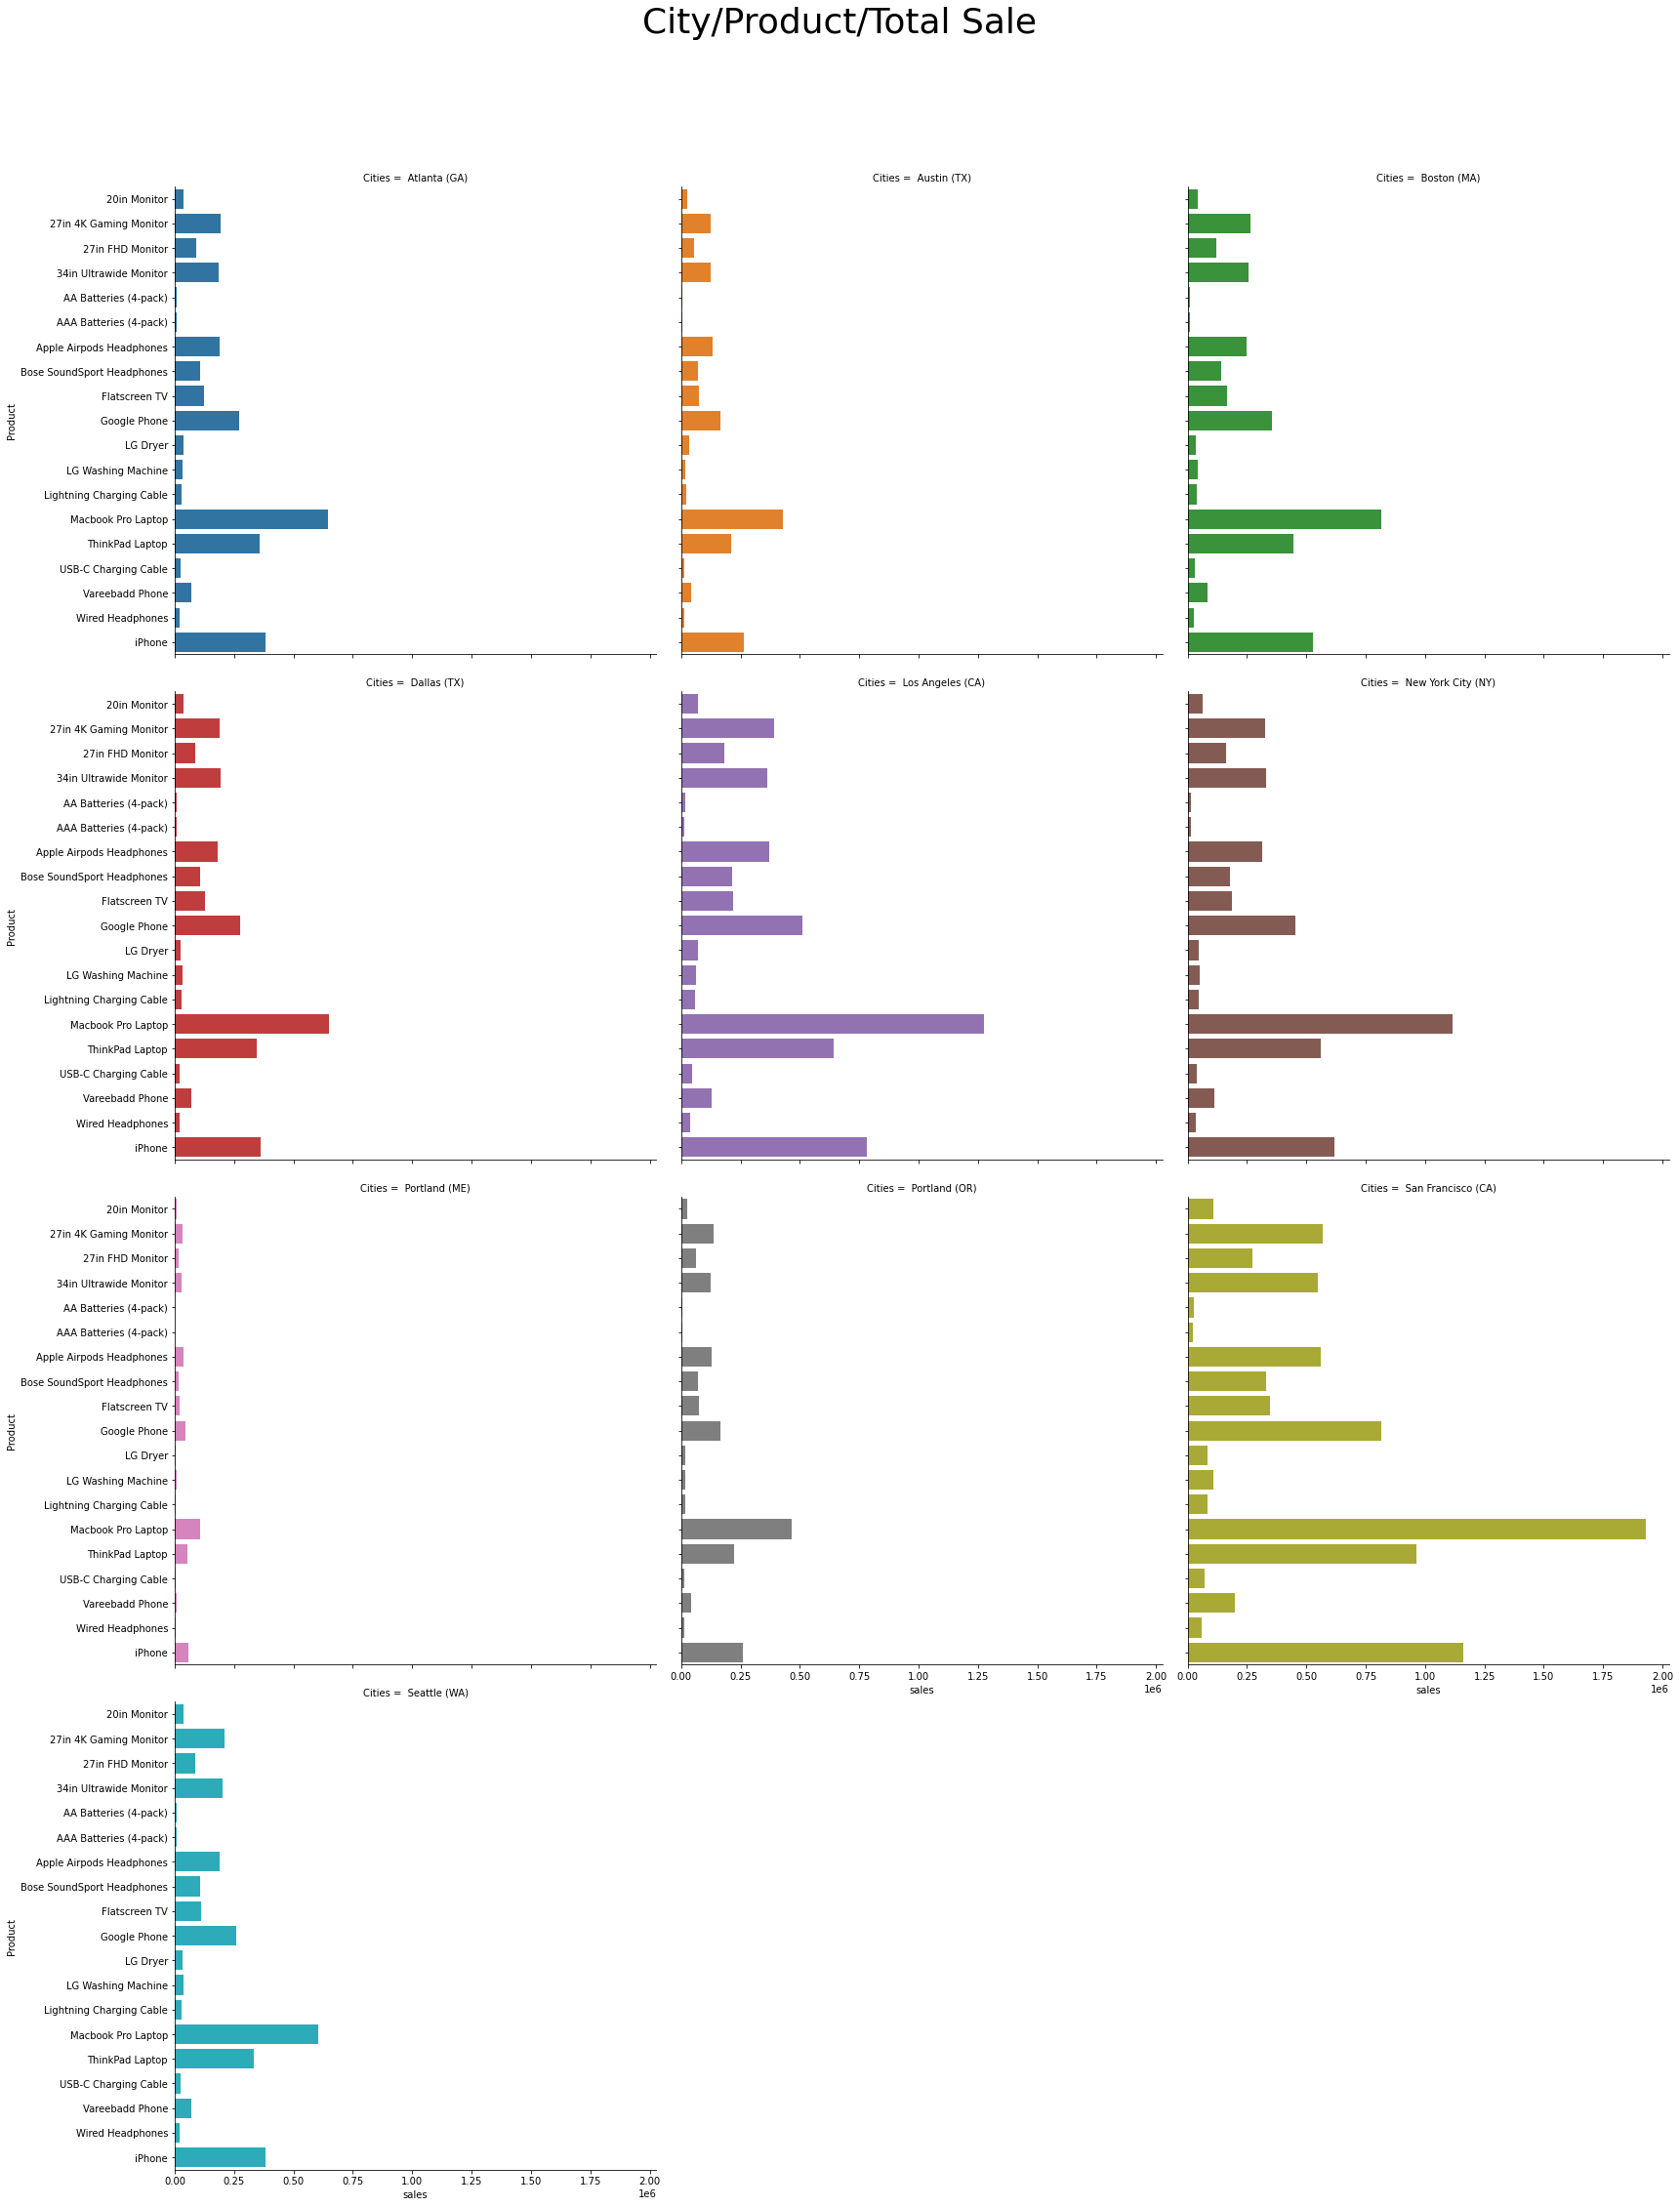

In [73]:
# data used in this section
temp_data = data.groupby(['Cities', 'Product']).sum().reset_index()

ax = sns.FacetGrid(temp_data, col="Cities", hue='Cities', col_wrap=3, size=8)
ax.map(sns.barplot, "sales", "Product")
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('City/Product/Total Sale', fontsize=36)
